In [1]:
# Read in zip files
import fsspec
import geopandas as gpd
import intake
import numpy as np
import pandas as pd

# My utilities
import utilities
from calitp import *

# Display
from IPython.display import HTML, Image, Markdown, display, display_html

# Geometry
from shared_utils import geography_utils, utils

/opt/conda/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
GCS_FILE_PATH = "gs://calitp-analytics-data/data-analyses/cellular_coverage/"

In [3]:
routes_df = utilities.load_unique_routes_df()

In [4]:
routes_df.shape

(2829, 7)

# T-Mobile
* Takes FOREVER to open clip t-mobile against california. 

In [5]:
# Open zip file first
PATH = "gs://calitp-analytics-data/data-analyses/cellular_coverage/T_Mobile_349525.zip"
with fsspec.open(PATH) as file:
    tmobile_1 = gpd.read_file(file)

In [6]:
PATH = "gs://calitp-analytics-data/data-analyses/cellular_coverage/T_Mobile_349527.zip"
with fsspec.open(PATH) as file:
    tmobile_2 = gpd.read_file(file)

In [7]:
PATH = "gs://calitp-analytics-data/data-analyses/cellular_coverage/T_Mobile_349687.zip"
with fsspec.open(PATH) as file:
    tmobile_3 = gpd.read_file(file)

In [8]:
tmobile_1.shape, tmobile_2.shape, tmobile_3.shape

((145050, 5), (118641, 5), (160571, 5))

In [9]:
# Stack tmobile
tmobile_all = pd.concat([tmobile_1, tmobile_2, tmobile_3])

In [11]:
type(tmobile_all)

geopandas.geodataframe.GeoDataFrame

In [31]:
tmobile_all.columns

Index(['DBA', 'TECHNOLOGY', 'MINDOWN', 'MINUP', 'geometry'], dtype='object')

In [ ]:
# Why does this not look like California at all??
tmobile_all.explore('TECHNOLOGY',  cmap="Blues")

In [25]:
len(tmobile_1) + len(tmobile_2) + len(tmobile_3) == len(tmobile_all)

True

<AxesSubplot:>

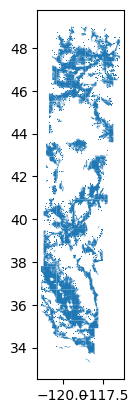

In [26]:
tmobile_1.plot()

<AxesSubplot:>

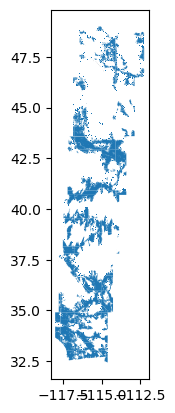

In [27]:
tmobile_2.plot()

<AxesSubplot:>

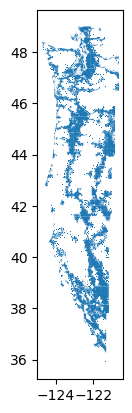

In [28]:
tmobile_3.plot()

In [12]:
# #xport T-mobile
# utils.geoparquet_gcs_export(tmobile_all, GCS_FILE_PATH, "tmobile_california")

# Trips
* How many trips are running for a route?

In [13]:
trips_df = pd.read_parquet(
    "gs://calitp-analytics-data/data-analyses/rt_delay/compiled_cached_views/trips_2022-05-04_all.parquet"
)

In [14]:
trips_df.shape

(104934, 14)

In [15]:
# Standardize route id  
trips_df["route_id"] = trips_df["route_id"].str.lower().str.strip()

In [16]:
# Aggregate trips_df: count each trip id based on unique? 
trips_agg = (trips_df
             .groupby(['calitp_itp_id', 'route_id'])
             .agg({'trip_id':'nunique'})
             .reset_index()
             .rename(columns = {'trip_id':'total_trips'})
            )

In [17]:
trips_agg.sort_values('total_trips').tail(10)

,calitp_itp_id,route_id,total_trips
1016,182,16-13159,275
1075,182,51-13159,280
1879,281,red line,288
1770,278,510,292
1096,182,720-13159,322
160,13,37329,356
1877,281,blue line,360
1132,183,4444,361
194,13,71,386
1104,182,804,406


In [18]:
# att_routes_list = att_merge_low_coverage["route_id"].unique().tolist()

In [19]:
# Filter out for route IDS
# trips_df2 = trips_df[trips_df["route_id"].isin(att_routes_list)]

In [20]:
# So many route ids disappeared
# f'{trips_df2["route_id"].nunique()} routes left after filtering trips_df compared to {len(att_routes_list)} routes in overlay.'

In [21]:
# Checking which ones are missing.
# id_routes = set(att_routes_list)
# id_trips = set(trips_df2.route_id.unique().tolist())
# missing_routes = list(id_routes - id_trips)

In [30]:
# f"{1-(len(id_trips)/len(id_routes))}% of routes are missing."